In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.ndimage

In [3]:
def NOT(x):
    return 1 - x

def AND(x, y):
    return np.minimum(x, y)

def OR(x, y):
    return np.maximum(x, y)

def SHARPEN(x):
    return 3*x**2 - 2*x**3

def SHARPEN2(x):
    return SHARPEN(SHARPEN(x))

def ERODE(x, S):
    return scipy.ndimage.minimum_filter(x, footprint=S, mode='constant')

def DILATE(x, S):
    return scipy.ndimage.maximum_filter(x, footprint=S, mode='constant')

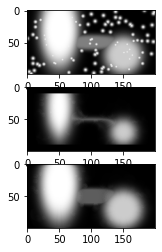

In [4]:
def blob(w, h, x0, y0, xsize, ysize=None):
    """Return an w*h image of a gaussian blob with radius size centered at x0, y0."""
    x = np.arange(w)
    y = np.arange(h)
    if ysize is None: ysize = xsize
    return np.outer(np.exp(-1/xsize**2/2*(np.arange(w) - x0)**2),
                    np.exp(-1/ysize**2/2*(np.arange(h) - y0)**2))

def disc(r):
    x = np.arange(-r,r+1)
    return np.add.outer(x**2, x**2) <= r**2

# Define a fuzzy set P
P = OR(OR(SHARPEN2(blob(200,100, 50, 30, 25, 50)),
           0.5*SHARPEN2(blob(200,100, 100, 50, 50, 10))),
       0.8*SHARPEN2(blob(200,100, 150, 70, 25, 25)))

for k in range(100):
    xk = np.random.randint(P.shape[0])
    yk = np.random.randint(P.shape[1])
    P = OR(P, blob(P.shape[0], P.shape[1], xk, yk, 2, 2))

#define a structuring element
S = disc(10)    
    
plt.subplot(3,1,1)
plt.imshow(P.T, cmap='gray', vmin=0, vmax=1)
plt.subplot(3,1,2)
plt.imshow(ERODE(P.T, S), cmap='gray', vmin=0, vmax=1)
plt.subplot(3,1,3)
plt.imshow(DILATE(ERODE(P.T, S), S), cmap='gray', vmin=0, vmax=1)

In [5]:
def connectivity_super_slow(P, seed_x, seed_y):
    Pc = 0*P
    Pc[seed_x, seed_y] = P[seed_x, seed_y]
    cross = np.zeros((3,3), dtype=bool)
    cross[1,0] = 1
    cross[0,1] = 1
    cross[1,2] = 1
    cross[2,1] = 1
    done = False
    while not done:
        Pcn = np.minimum(P, DILATE(Pc, cross))
        Pcn[seed_x, seed_y] = P[seed_x, seed_y]
        done = np.sum(Pc != Pcn) == 0
        Pc = Pcn
    return Pc

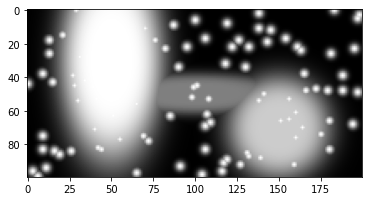

In [6]:
plt.imshow(P.T, cmap='gray', vmin=0, vmax=1)

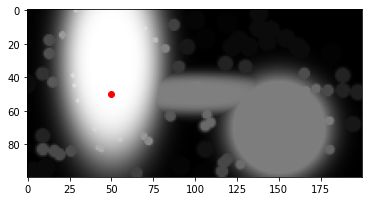

In [7]:
Pc1 = connectivity_super_slow(P.T, 50, 50)
plt.imshow(Pc1, cmap='gray', vmin=0, vmax=1)
plt.plot(50,50,'or')


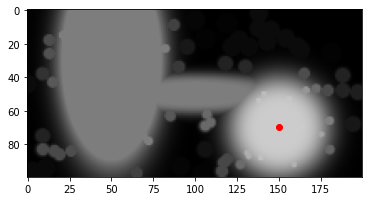

In [8]:
Pc2 = connectivity_super_slow(P.T, 70, 150)
plt.imshow(Pc2, cmap='gray', vmin=0, vmax=1)
plt.plot(150,70,'or')

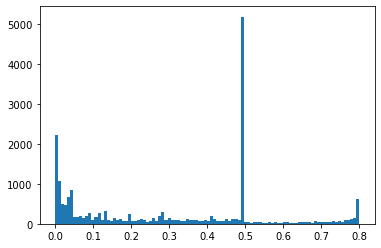

In [9]:
dum = plt.hist(Pc2.ravel(), bins=100)

Text(0, 0.5, 'Probability threshold')

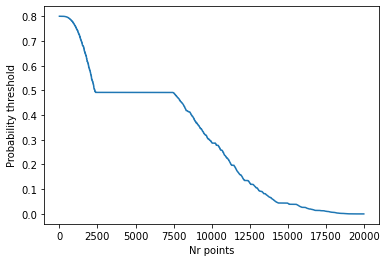

In [12]:
plt.plot(np.flip(np.sort(Pc2.ravel())))
plt.xlabel('Nr points')
plt.ylabel('Probability threshold')